Import Libraries

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Load Datasets

In [2]:
customers = pd.read_csv('../data/customers.csv')
transactions = pd.read_csv('../data/transactions.csv')

View First 5 Customers Records

In [3]:
customers.head()

,CustomerID,Age,Gender,MaritalStatus,Education,EmploymentStatus,Income,LoanAmount,NumLoans,CreditHistoryLength,AvgMonthlyExpenses,Savings,CreditCardUsage,MobileMoneyUsage,LatePayments,Default
0,1,34,Male,Single,Primary,Self-Employed,37144.72,161.06,3,20,20478.75,14707.29,Low,Frequent,0,0
1,2,39,Female,Single,Diploma,Unemployed,54508.16,21456.76,0,3,43505.46,20073.77,Low,Rare,0,0
2,3,39,Female,Single,Diploma,Employed,34758.57,5824.01,2,7,21689.46,17201.33,High,Very Frequent,0,0
3,4,46,Male,Single,Primary,Employed,50751.69,61473.55,3,19,29524.77,23594.02,Low,Very Frequent,4,0
4,5,30,Male,Married,Primary,Self-Employed,54497.28,52531.70,1,19,16812.80,20820.11,Low,Very Frequent,0,0


View Last 5 Customers Records

In [4]:
customers.tail()

,CustomerID,Age,Gender,MaritalStatus,Education,EmploymentStatus,Income,LoanAmount,NumLoans,CreditHistoryLength,AvgMonthlyExpenses,Savings,CreditCardUsage,MobileMoneyUsage,LatePayments,Default
999995,999996,62,Female,Single,Bachelor,Employed,64894.30,21455.38,2,19,44654.05,30603.98,Medium,Very Frequent,2,0
999996,999997,39,Male,Married,Masters,Self-Employed,79814.12,3432.92,2,12,31919.19,9587.11,Low,Rare,2,0
999997,999998,21,Male,Married,Primary,Employed,39691.91,54384.47,2,11,26563.78,7934.11,Low,Very Frequent,0,0
999998,999999,44,Female,Married,Secondary,Employed,65972.40,2007.50,3,11,41176.55,21072.67,High,Very Frequent,0,0
999999,1000000,29,Male,Single,PhD,Self-Employed,78491.17,55614.28,2,24,59422.09,15648.03,Medium,Frequent,1,0


View First 5 Transactions Records

In [5]:
transactions.head()

,TransactionID,CustomerID,Amount,Channel,MerchantType,Region,TimeOfDay,DayOfWeek,Fraud
0,1,15796,1765.38,POS,Retail,Nakuru,Evening,Sunday,0
1,2,861,3280.04,Mobile,Entertainment,Mombasa,Afternoon,Thursday,0
2,3,76821,1784.33,ATM,Supermarket,Kisumu,Morning,Friday,0
3,4,54887,21.09,Mobile,Travel,Other,Evening,Saturday,0
4,5,6266,880.74,Online,Entertainment,Other,Morning,Tuesday,0


View Last 5 Transactions Records

In [6]:
transactions.tail()

,TransactionID,CustomerID,Amount,Channel,MerchantType,Region,TimeOfDay,DayOfWeek,Fraud
999995,999996,66770,3832.75,ATM,Supermarket,Nairobi,Evening,Tuesday,0
999996,999997,53113,638.07,ATM,Food & Beverage,Mombasa,Night,Thursday,0
999997,999998,54332,509.32,POS,Supermarket,Nairobi,Night,Wednesday,0
999998,999999,51995,2316.87,ATM,Electronics,Mombasa,Morning,Friday,0
999999,1000000,23976,245.43,Online,Healthcare,Nairobi,Evening,Thursday,0


Customers Dataset Check Info

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   CustomerID           1000000 non-null  int64  
 1   Age                  1000000 non-null  int64  
 2   Gender               1000000 non-null  object 
 3   MaritalStatus        1000000 non-null  object 
 4   Education            950070 non-null   object 
 5   EmploymentStatus     1000000 non-null  object 
 6   Income               1000000 non-null  float64
 7   LoanAmount           1000000 non-null  float64
 8   NumLoans             1000000 non-null  int64  
 9   CreditHistoryLength  1000000 non-null  int64  
 10  AvgMonthlyExpenses   1000000 non-null  float64
 11  Savings              1000000 non-null  float64
 12  CreditCardUsage      1000000 non-null  object 
 13  MobileMoneyUsage     1000000 non-null  object 
 14  LatePayments         1000000 non-null  int64  
 15 

Transactions Dataset Check Info

In [8]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   TransactionID  1000000 non-null  int64  
 1   CustomerID     1000000 non-null  int64  
 2   Amount         1000000 non-null  float64
 3   Channel        1000000 non-null  object 
 4   MerchantType   1000000 non-null  object 
 5   Region         1000000 non-null  object 
 6   TimeOfDay      1000000 non-null  object 
 7   DayOfWeek      1000000 non-null  object 
 8   Fraud          1000000 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 68.7+ MB


Customers Dataset Desriptive Analysis

In [9]:
customers.describe(include='all')

,CustomerID,Age,Gender,MaritalStatus,Education,EmploymentStatus,Income,LoanAmount,NumLoans,CreditHistoryLength,AvgMonthlyExpenses,Savings,CreditCardUsage,MobileMoneyUsage,LatePayments,Default
count,1000000.000000,1000000.000000,1000000,1000000,950070,1000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000,1000000,1000000.000000,1000000.000000
unique,NaN,NaN,2,4,6,5,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN
top,NaN,NaN,Female,Single,Secondary,Employed,NaN,NaN,NaN,NaN,NaN,NaN,Medium,Frequent,NaN,NaN
freq,NaN,NaN,500284,449876,350005,499943,NaN,NaN,NaN,NaN,NaN,NaN,400404,499892,NaN,NaN
mean,500000.500000,43.494123,NaN,NaN,NaN,NaN,50083.136461,29947.522764,1.999273,12.013856,27545.146653,15017.036809,NaN,NaN,1.001364,0.065961
std,288675.278932,14.998818,NaN,NaN,NaN,NaN,19790.048336,29920.874775,1.414938,7.210734,13373.145611,8590.920157,NaN,NaN,1.000652,0.248214
min,1.000000,18.000000,NaN,NaN,NaN,NaN,5000.000000,0.000000,0.000000,0.000000,1500.610000,500.120000,NaN,NaN,0.000000,0.000000
25%,250000.750000,31.000000,NaN,NaN,NaN,NaN,36476.857500,8629.885000,1.000000,6.000000,17828.462500,8353.540000,NaN,NaN,0.000000,0.000000
50%,500000.500000,43.000000,NaN,NaN,NaN,NaN,49983.985000,20769.010000,2.000000,12.000000,25877.235000,13534.440000,NaN,NaN,1.000000,0.000000
75%,750000.250000,56.000000,NaN,NaN,NaN,NaN,63514.602500,41491.930000,3.000000,18.000000,35795.477500,20334.815000,NaN,NaN,2.000000,0.000000


Transactions Dataset Descriptive Analysis

In [10]:
transactions.describe(include='all')

,TransactionID,CustomerID,Amount,Channel,MerchantType,Region,TimeOfDay,DayOfWeek,Fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000,1000000,1000000,1000000,1000000,1000000.000000
unique,NaN,NaN,NaN,4,7,6,4,7,NaN
top,NaN,NaN,NaN,Online,Electronics,Eldoret,Afternoon,Tuesday,NaN
freq,NaN,NaN,NaN,400165,143239,167109,350324,143236,NaN
mean,500000.500000,50014.595087,2001.125419,NaN,NaN,NaN,NaN,NaN,0.057899
std,288675.278932,28864.277887,2001.554681,NaN,NaN,NaN,NaN,NaN,0.233552
min,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,250000.750000,24998.000000,575.300000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,500000.500000,50048.000000,1387.735000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,750000.250000,75022.000000,2773.210000,NaN,NaN,NaN,NaN,NaN,0.000000


Check for and Handling Missing Values in Customers Dataset

In [11]:
for column in customers:
    if customers[column].isnull().sum() > 0:
        missing_count = customers[column].isnull().sum()
        mode_value = customers[column].mode()[0]
        customers[column] = customers[column].fillna(mode_value)
        print(f"Missing values {missing_count} in column '{column}' replaced by mode: {mode_value}")
    else:
        print(f"No missing values in column '{column}'")

No missing values in column 'CustomerID'
No missing values in column 'Age'
No missing values in column 'Gender'
No missing values in column 'MaritalStatus'
Missing values 49930 in column 'Education' replaced by mode: Secondary
No missing values in column 'EmploymentStatus'
No missing values in column 'Income'
No missing values in column 'LoanAmount'
No missing values in column 'NumLoans'
No missing values in column 'CreditHistoryLength'
No missing values in column 'AvgMonthlyExpenses'
No missing values in column 'Savings'
No missing values in column 'CreditCardUsage'
No missing values in column 'MobileMoneyUsage'
No missing values in column 'LatePayments'
No missing values in column 'Default'


Check for and Handling Missing Values in Transactions Dataset

In [12]:
for column in transactions:
    if transactions[column].isnull().sum() > 0:
        missing_count = transactions[column].isnull().sum()
        mode_value = transactions[column].mode()[0]
        transactions[column] = transactions[column].fillna(mode_value)
        print(f"Missing values {missing_count} in column '{column}' replaced by mode: {mode_value}")
    else:
        print(f"No missing values in column '{column}'")

No missing values in column 'TransactionID'
No missing values in column 'CustomerID'
No missing values in column 'Amount'
No missing values in column 'Channel'
No missing values in column 'MerchantType'
No missing values in column 'Region'
No missing values in column 'TimeOfDay'
No missing values in column 'DayOfWeek'
No missing values in column 'Fraud'


Check for and Handling Outliers in Customers Dataset

In [13]:
cus_z_scores = np.abs(stats.zscore(customers.select_dtypes(include=[np.number])))
cus_outliers = (cus_z_scores > 3).any(axis=1)
print(f"Found outliers in customers dataset")

# Replace outliers with mode of the column
for column in customers.select_dtypes(include=[np.number]).columns:
    if column == 'CustomerID':
        continue
    mode_value = customers[column].mode()[0]
    customers.loc[cus_outliers, column] = mode_value
    print(f"Outliers in column '{column}' replaced by mode: {mode_value}")

# Alternatively, to remove outliers, uncomment the following line: 
# customers = customers[~cus_outliers]
# print(f"Customers dataset shape after removing outliers: {customers.shape}")

Found outliers in customers dataset
Outliers in column 'Age' replaced by mode: 55
Outliers in column 'Income' replaced by mode: 5000.0
Outliers in column 'LoanAmount' replaced by mode: 217.79
Outliers in column 'NumLoans' replaced by mode: 1
Outliers in column 'CreditHistoryLength' replaced by mode: 22
Outliers in column 'AvgMonthlyExpenses' replaced by mode: 15547.75
Outliers in column 'Savings' replaced by mode: 6807.25
Outliers in column 'LatePayments' replaced by mode: 1
Outliers in column 'Default' replaced by mode: 0


Check for and Handling Outliers in Transactions Dataset

In [14]:
trans_z_scores = np.abs(stats.zscore(transactions.select_dtypes(include=[np.number])))
trans_outliers = (trans_z_scores > 3).any(axis=1)
print(f"Found outliers in transactions dataset")

# Replace outliers with mode of the column
for column in transactions.select_dtypes(include=[np.number]).columns:
    if column == 'TransactionID' or column == 'CustomerID':
        continue
    mode_value = transactions[column].mode()[0]
    transactions.loc[trans_outliers, column] = mode_value
    print(f"Outliers in column '{column}' replaced by mode: {mode_value}")

# Alternatively, to remove outliers, uncomment the following line: 
# transactions = transactions[~trans_outliers]
# print(f"Transactions dataset shape after removing outliers: {transactions.shape}")

Found outliers in transactions dataset
Outliers in column 'Amount' replaced by mode: 714.42
Outliers in column 'Fraud' replaced by mode: 0


# Explorations on Customers Dataset

## Demographic

In [15]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   CustomerID           1000000 non-null  int64  
 1   Age                  1000000 non-null  int64  
 2   Gender               1000000 non-null  object 
 3   MaritalStatus        1000000 non-null  object 
 4   Education            1000000 non-null  object 
 5   EmploymentStatus     1000000 non-null  object 
 6   Income               1000000 non-null  float64
 7   LoanAmount           1000000 non-null  float64
 8   NumLoans             1000000 non-null  int64  
 9   CreditHistoryLength  1000000 non-null  int64  
 10  AvgMonthlyExpenses   1000000 non-null  float64
 11  Savings              1000000 non-null  float64
 12  CreditCardUsage      1000000 non-null  object 
 13  MobileMoneyUsage     1000000 non-null  object 
 14  LatePayments         1000000 non-null  int64  
 15 

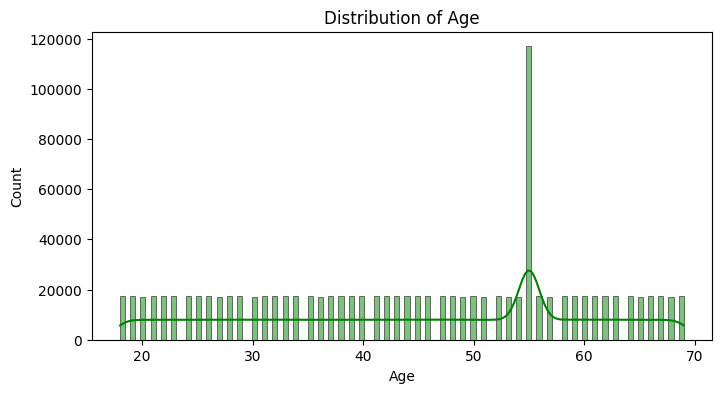

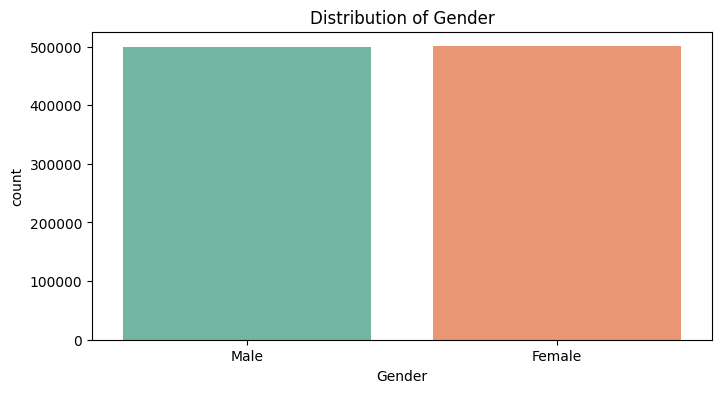

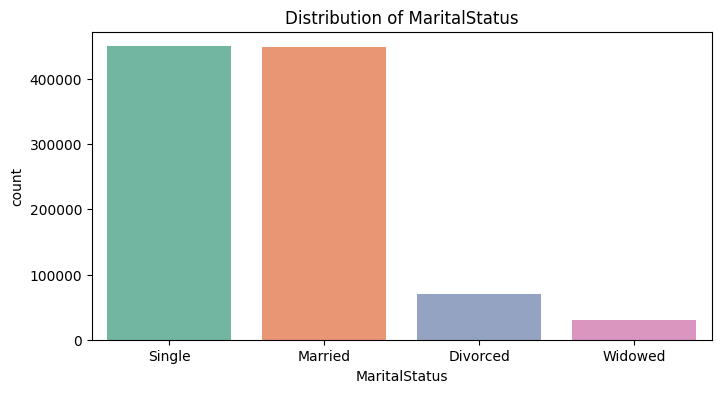

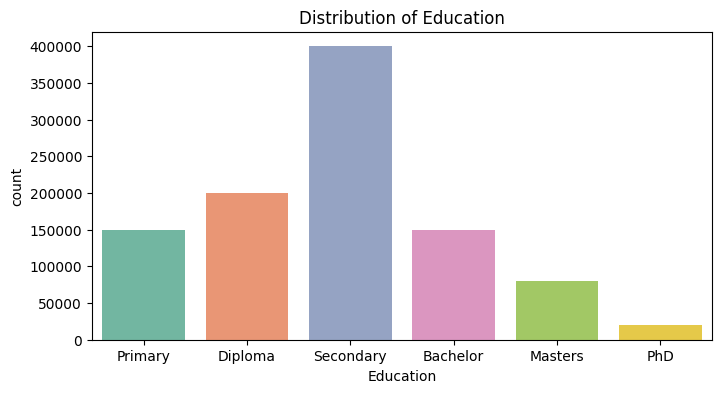

In [ ]:
demographic_cols = ['Age', 'Gender', 'MaritalStatus', 'Education']
for col in demographic_cols:
    plt.figure(figsize=(8, 4))
    if customers[col].dtype == 'object':
        sns.countplot(data=customers, x=col, hue=col, palette='Set2')
    else:
        sns.histplot(data=customers, x=col, kde=True, color='green')
    plt.title(f'Distribution of {col}')
    plt.show()

# Crosstabulation between Education and Income
pd.crosstab(customers['Education'], customers['Income']).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Education vs Income')
plt.xlabel('Education Level')
plt.ylabel('#')
plt.show()

# Crosstabulation between Marital Status and Default
pd.crosstab(customers['MaritalStatus'], customers['Default']).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Marital Status vs Default')
plt.xlabel('Marital Status')
plt.ylabel('#')
plt.show()